In [109]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
from google.colab import files
uploaded = files.upload()


Saving car details v4.csv to car details v4 (1).csv


Step 1: Import Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import pickle


Step 2: Load Dataset

In [129]:
df = pd.read_csv("car details v4 (1).csv")
print("✅ Data Loaded Successfully\n")

✅ Data Loaded Successfully



Step 3: Explore Dataset

In [130]:
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Fuel Types:", df['Fuel Type'].unique())
print("Unique Seller Types:", df['Seller Type'].unique())
print("Unique Transmission Types:", df['Transmission'].unique())
print("Unique Owner Types:", df['Owner'].unique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float

Step 4: Data Cleaning

In [131]:
df = df.drop_duplicates()
df = df.dropna()


Step 5: Feature Engineering

In [115]:
CURRENT_YEAR = 2025
df['car_age'] = CURRENT_YEAR - df['Year']

Step 6: Drop Unnecessary Columns

In [116]:
df = df.drop(columns=['Make', 'Year'])


Step 7: Convert Categorical Columns into Numerical (One-Hot Encoding)



In [117]:
df = pd.get_dummies(df, drop_first=True)


Step 8: Define Features (X) and Target (y)

In [118]:
X = df.drop(columns=['Price'])
y = df['Price']


Step 9: Split Dataset into Training and Testing *Sets*

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 10: Train Linear Regression Model



In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 11: Make Predictions

In [121]:
y_pred = model.predict(X_test)

Step 12: Evaluate Model

In [122]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"\n✅ Model Evaluation Results:")
print(f"R2 Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


✅ Model Evaluation Results:
R2 Score: -2.529
Mean Absolute Error: 3022438.66


Step 13: Visualize Actual vs Predicted Prices

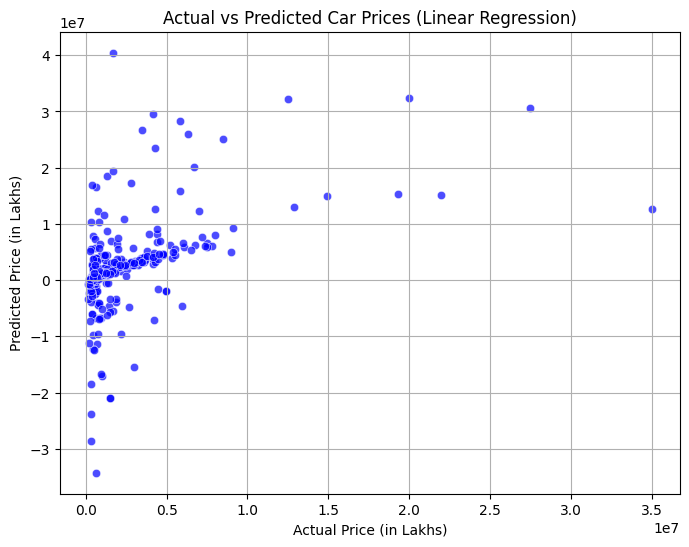

In [123]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Price (in Lakhs)")
plt.ylabel("Predicted Price (in Lakhs)")
plt.title("Actual vs Predicted Car Prices (Linear Regression)")
plt.grid(True)
plt.show()

Step 14: Regression Line Visualization

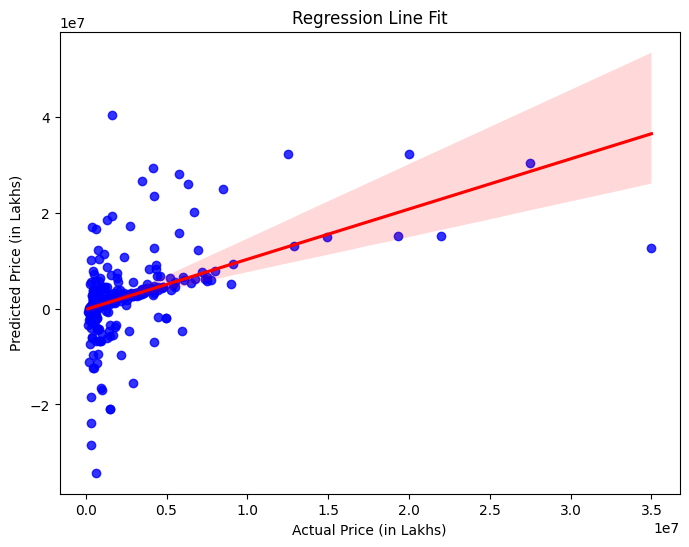

In [124]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel("Actual Price (in Lakhs)")
plt.ylabel("Predicted Price (in Lakhs)")
plt.title("Regression Line Fit")
plt.show()

Step 15: Save Trained Model

In [125]:
with open("car_price_linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("\n✅ Model saved as 'car_price_linear_model.pkl'")


✅ Model saved as 'car_price_linear_model.pkl'


In [126]:
from google.colab import files
files.download('car_price_linear_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:
# Simple README.md creation (safe version)

text = """Car Price Prediction Project
==================================

Project Overview
----------------
This project predicts the selling price of used cars using a Machine Learning model.
The dataset includes features like year, fuel type, seller type, transmission, and owner.

Dataset Information
-------------------
File: car details v4.csv

Columns:
- name: Car name and model
- year: Manufacturing year
- selling_price: Selling price of the car
- km_driven: Distance driven
- fuel: Fuel type (Petrol/Diesel/CNG/LPG)
- seller_type: Dealer or Individual
- transmission: Manual or Automatic
- owner: Number of previous owners

Machine Learning Model
----------------------
1. Linear Regression (baseline model)
2. Random Forest Regressor (improved accuracy)

Steps to Run in Google Colab
----------------------------
1. Upload the dataset:
   from google.colab import files
   uploaded = files.upload()

2. Import libraries:
   import pandas as pd, numpy as np, matplotlib.pyplot as plt

3. Train and test the model as shown in the notebook.

Upload to GitHub
----------------
- Create a new repository on GitHub
- Upload the following files:
  - car details v4.csv
  - car_price_prediction.ipynb
  - README.md
  - requirements.txt

Author
-------
Supreetha Shetty
Electronics and Communication Engineering Student
"""

# Save the text to README.md file
with open("README.md", "w") as file:
    file.write(text)

print("✅ Simple README.md file created successfully!")


✅ Simple README.md file created successfully!


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import pickle

In [134]:
df = pd.read_csv(next(iter(uploaded)))
print("✅ Data Loaded Successfully\n")

✅ Data Loaded Successfully



In [135]:
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Fuel Types:", df['Fuel Type'].unique())
print("Unique Seller Types:", df['Seller Type'].unique())
print("Unique Transmission Types:", df['Transmission'].unique())
print("Unique Owner Types:", df['Owner'].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float

In [136]:
df = df.drop_duplicates()
df = df.dropna()

In [137]:
CURRENT_YEAR = 2025
df['car_age'] = CURRENT_YEAR - df['Year']

In [138]:
df = df.drop(columns=['Make', 'Year'])

In [139]:
df = pd.get_dummies(df, drop_first=True)

In [140]:
X = df.drop(columns=['Price'])
y = df['Price']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [142]:
y_pred = model.predict(X_test)

In [143]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"\n✅ Model Evaluation Results:")
print(f"R2 Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")


✅ Model Evaluation Results:
R2 Score: -2.529
Mean Absolute Error: 3022438.66


In [144]:
from google.colab import files
files.download("README.md")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
# Simple requirements.txt creation

requirements = """pandas
numpy
matplotlib
seaborn
scikit-learn
"""

# Save the text to requirements.txt file
with open("requirements.txt", "w") as file:
    file.write(requirements)

print("✅ requirements.txt file created successfully!")


✅ requirements.txt file created successfully!


In [146]:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>